# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

In [20]:
def eda_2_nn(data, feature, target) :
    # 산점도
    temp = data.loc[data[feature].notnull()]
    
    sns.scatterplot( x= feature, y = target, data = temp)
    plt.grid()

    sns.jointplot( x= feature, y = target, data = temp)
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    result = spst.pearsonr(temp[feature], temp[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\user\AppData\Local\Temp\ipykernel_22188\3437371505.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


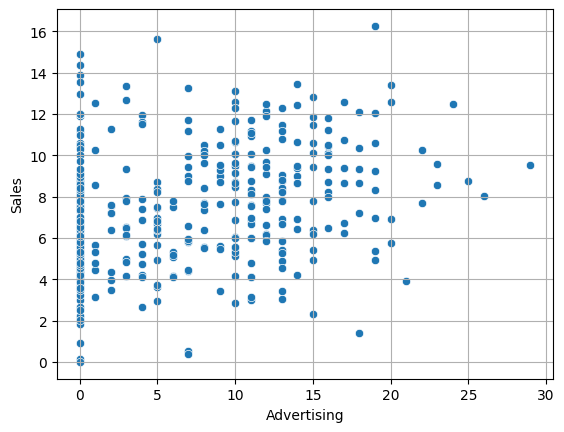

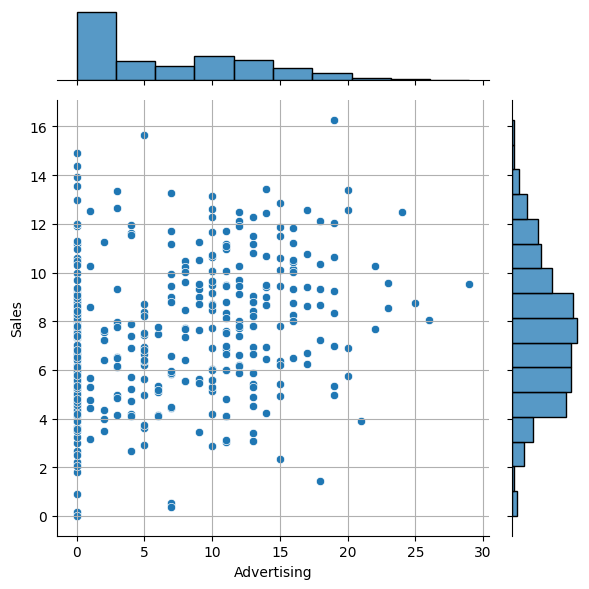

상관계수 : 0.269506781376902, P-value : 4.3776771103027514e-08


In [21]:
eda_2_nn(data, 'Advertising', target)

2) 수치화 : 상관분석

In [ ]:
# 상관계수 : 0.269506781376902, P-value : 4.3776771103027514e-08

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 아주 약한 양의 상관관계를 갖는다. 0을 제외한 값들은 대체로 advertising이 증가함에 따라 sales 또한 증가함을 알 수 있다.

### (2) Population -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\user\AppData\Local\Temp\ipykernel_22188\3437371505.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


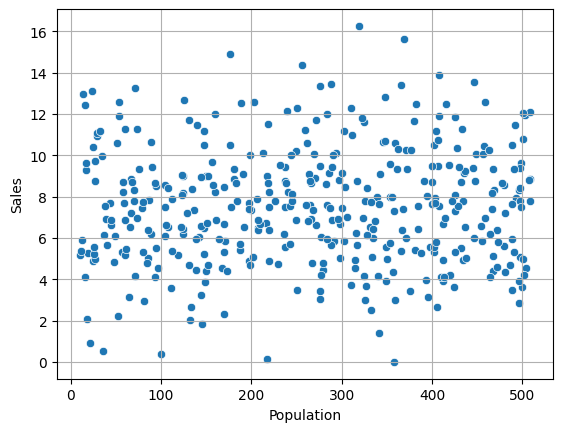

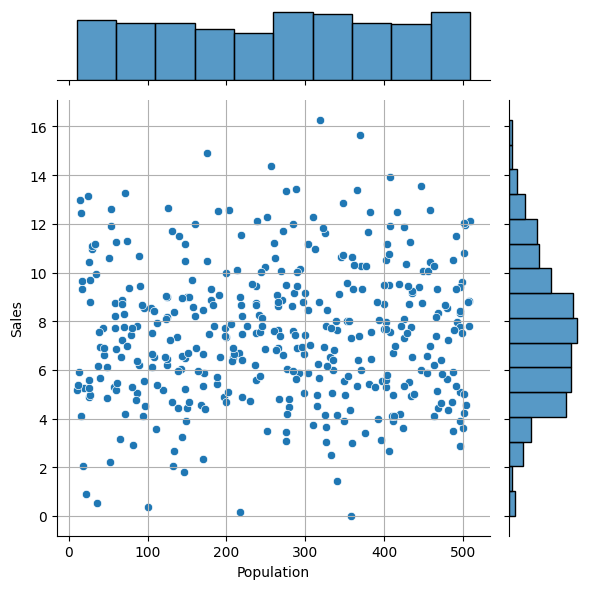

상관계수 : 0.0504709844720392, P-value : 0.3139816093190483


In [22]:
eda_2_nn(data, 'Population', target)

2) 수치화 : 상관분석

In [ ]:
# 상관계수 : 0.0504709844720392, P-value : 0.3139816093190483

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# Population 과 Salse 간에는 상관관계가 없다고 해도 무방하다.

### (3) Price -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\user\AppData\Local\Temp\ipykernel_22188\3437371505.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


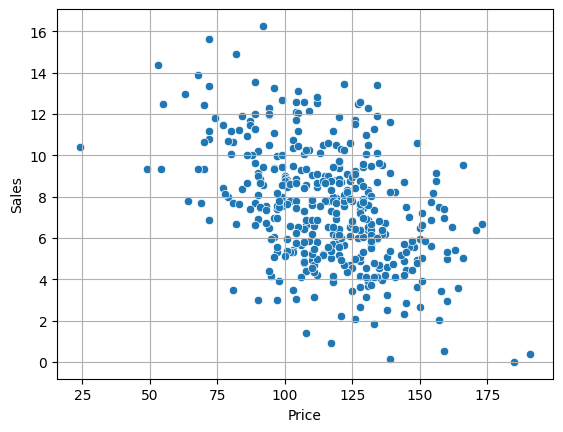

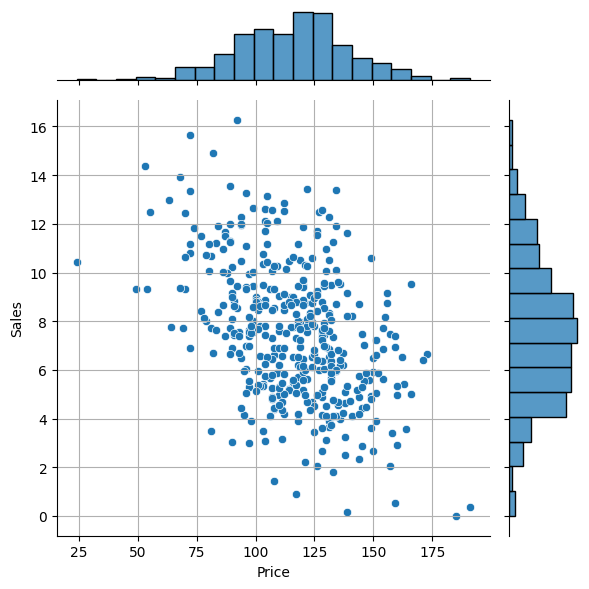

상관계수 : -0.4449507278465726, P-value : 7.618187011913169e-21


In [23]:
eda_2_nn(data, 'Price', target)

2) 수치화 : 상관분석

In [ ]:
# 상관계수 : -0.4449507278465726, P-value : 7.618187011913169e-21

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 약한 음의 상관 관계를 보인다. 가격이 높아 질수록 sales가 줄어드는 경향을 보인다. 중간 가격대에 sales가 몰려 있음을 확인할 수 있다.

### (4) Age -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\user\AppData\Local\Temp\ipykernel_22188\3437371505.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


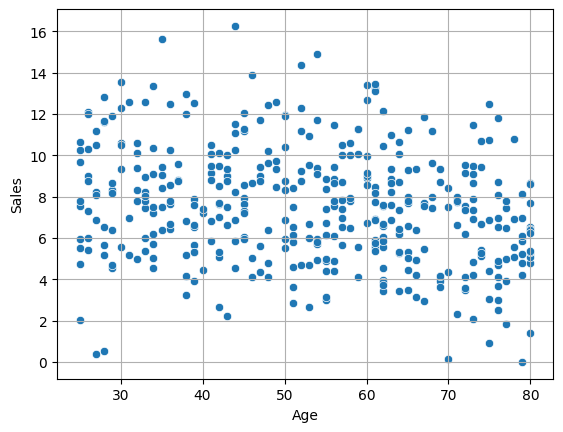

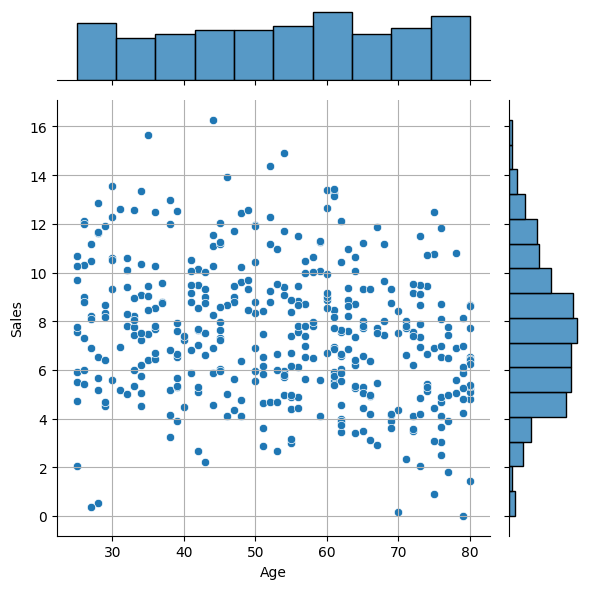

상관계수 : -0.2318154396045765, P-value : 2.7889498393714038e-06


In [24]:
eda_2_nn(data, 'Age', target)

2) 수치화 : 상관분석

In [ ]:
# 상관계수 : -0.2318154396045765, P-value : 2.7889498393714038e-06

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 아주 약한 음의 상관 관계를 갖는다. Age와 Sales간에 유의미한 관계가 있어보이지는 않는다.

### (5) CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\user\AppData\Local\Temp\ipykernel_22188\3437371505.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


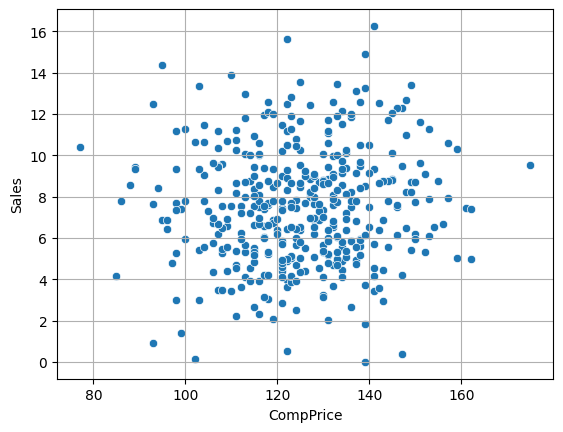

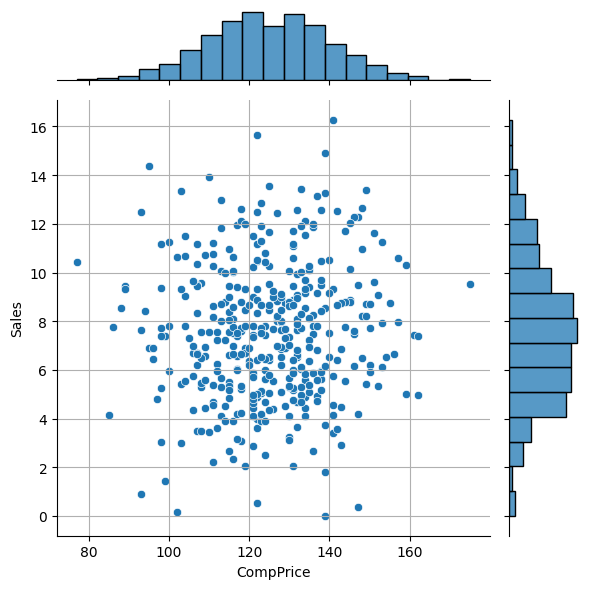

상관계수 : 0.06407872955062152, P-value : 0.20093982894184007


In [25]:
eda_2_nn(data, 'CompPrice', target)

2) 수치화 : 상관분석

In [ ]:
# 상관계수 : 0.06407872955062152, P-value : 0.20093982894184007

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 유의미한 상관관계를 갖지 않는다. 경쟁사 또한 중간 가격대의 제품에 sales가 몰려있음을 확인할 수 있다.

### (6) Income -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\user\AppData\Local\Temp\ipykernel_22188\3437371505.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


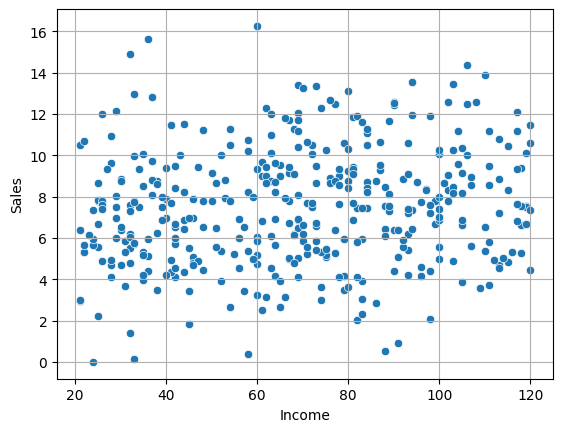

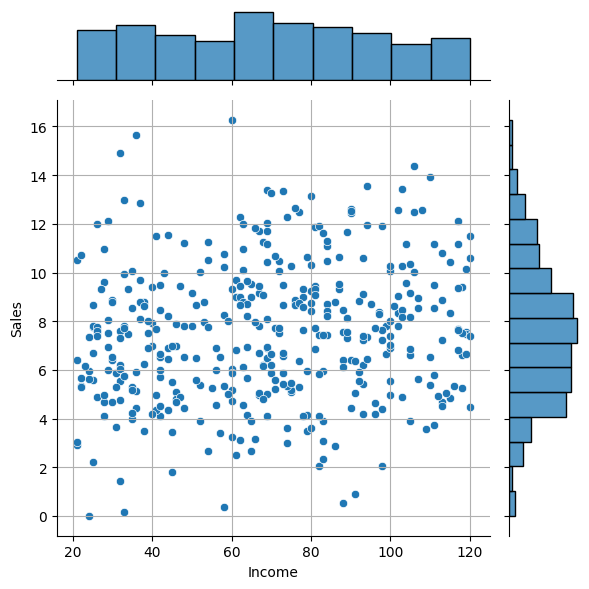

상관계수 : 0.15195097946754424, P-value : 0.0023096704539517948


In [26]:
eda_2_nn(data, 'Income', target)

2) 수치화 : 상관분석

In [ ]:
# 상관계수 : 0.15195097946754424, P-value : 0.0023096704539517948

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 유의미한 상관관계를 갖지 않는다. 카시트는 어린 자녀가 있는 집에 필수품이기 때문에 수입과 큰 관련이 없어보인다.

## 2.범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

In [43]:
def anal_1(data, feature, target):
    temp = data.loc[data[feature].notnull()]
    
    plt.subplot(1,2,1)
    sns.barplot(x=feature, y=target, data=temp)
    plt.grid()

    plt.subplot(1,2,2)
    sns.boxplot(x=feature, y=target, data=temp)
    plt.grid()

### (1) ShelveLoc-> Sales

1) 시각화 : scatter(regplot), jointplot

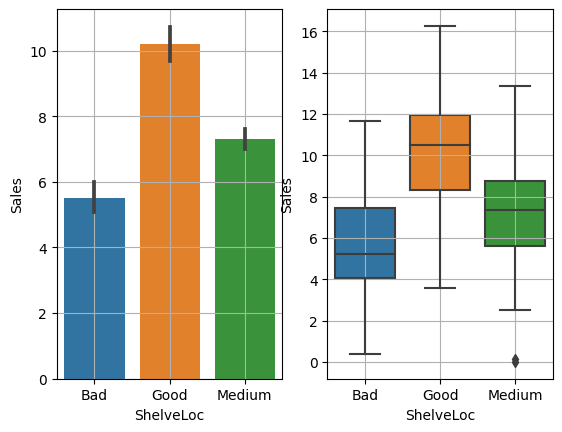

In [45]:
anal_1(data, 'ShelveLoc', target)

2) 수치화 : 상관분석

In [49]:
temp = data.loc[data[target].notnull()]

S_0 = temp.loc[temp.ShelveLoc == 'Bad', target]
S_1 = temp.loc[temp.ShelveLoc == 'Good', target]
S_2 = temp.loc[temp.ShelveLoc == 'Medium', target]


spst.f_oneway(S_0, S_1, S_2)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 진열상태와 sales간에는 매우 강한 상관관계가 있다. 진열상태가 좋을수록 판매량이 좋다.

### (2) Urban -> Sales

1) 시각화 : scatter(regplot), jointplot

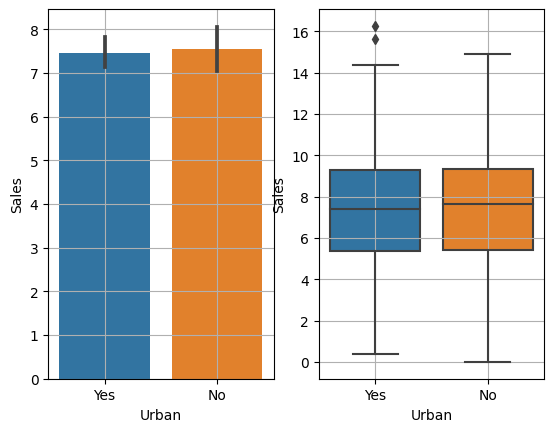

In [47]:
anal_1(data, 'Urban', target)

2) 수치화 : 상관분석

In [40]:
feature = 'Urban'

t1 = data.loc[data[feature] == data[feature].value_counts().index[0], target]
t2 = data.loc[data[feature] == data[feature].value_counts().index[1], target]

spst.ttest_ind(t1, t2)

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 도심에 있는지의 여부와 sales는 큰 상관관계를 보이지 않는다.

### (3) US-> Sales

1) 시각화 : scatter(regplot), jointplot

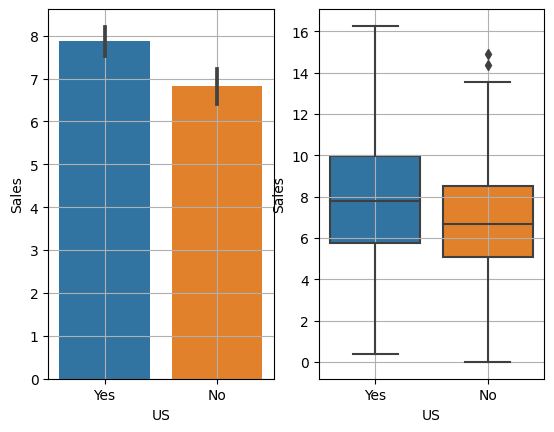

In [48]:
anal_1(data, 'US', target)

2) 수치화 : 상관분석

In [41]:
feature = 'US'

t1 = data.loc[data[feature] == data[feature].value_counts().index[0], target]
t2 = data.loc[data[feature] == data[feature].value_counts().index[1], target]

spst.ttest_ind(t1, t2)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 중간정도의 상관관계를 보임

## 3.관계 정리하기

① 강한관계

In [ ]:
# ShelveLoc

② 중간관계

In [ ]:
# Price, Age, Advertising, Income, US

③ 관계없음

In [ ]:
# CompPrice, Pop, Urban